# Prepare Workspace 

## Load Packages

In [2]:
library(tidyverse) # Tidyverse!
library(corrr) # "Tidy" approach to correlation matrices
library(haven) # Imports SPSS files
library(lavaan) # Structural Equation Modelling (SEM) package used for Confirmatory Factor Analysis (CFA)
library(semPlot) # Plots results of SEM/CFA
library(psych) # Reliability Analysis

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

This is lavaan 0.6-6

lavaan is BETA software! Please report any bugs.

Registered S3 methods overwritten by 'huge':
  method    from   
  plot.sim  BDgraph
  print.sim BDgraph


Attaching package: ‘psych’


The following object is masked from ‘package:lavaan’:

    cor2cov


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




## Plotting Parameters


In [22]:
options(repr.plot.width=9, repr.plot.height=6)

## Read Data

---
Note that data is cleaned in `fr_clustering_R` script.

In [4]:
dataset = read_csv("data/cluster_cleaned.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  demo_time = col_character(),
  demo_ethnicity = col_character(),
  demo_diet = col_character(),
  demo_diet_detail = col_character(),
  demo_familiar = col_character(),
  demo_previous_food = col_character(),
  demo_previous_food_time = col_time(format = "")
)

See spec(...) for full column specifications.



In [8]:
head(dataset,3)

demo_time,demo_id,demo_female,demo_ethnicity,demo_age,demo_weight,demo_height,demo_yrs_canada,demo_diet,demo_diet_detail,⋯,s_7_try_dd,s_8_try_xthink_tasty,s_9_think_unhealthy,s_10_xthink_hungry,s_11_change_food_thoughts,s_12_xlook_pics,s_13_think_healthy,s_14_xchange_want_changed_choice,s_15_try_dd,s_16_try_xthink_tasty
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6/27/2018 16:15:13,101,1,White/Caucasian,28,118,170.0,28,No,NA,⋯,7,9,8,7,5,1,8,6,8,7
6/28/2018 17:50:06,102,1,Asian/Asian Canadian,23,109,162.5,5,Yes,"low carb, 6 months",⋯,2,8,8,4,4,1,4,5,3,4
6/29/2018 15:19:16,103,1,Asian/Asian Canadian,20,110,157.5,3,Yes,Juice cleanse -- 1 week,⋯,8,8,8,8,8,3,8,8,9,8


---
# Factor Analysis

---

## Examine Raw Associations Between Items

In [41]:
# Remove doubled columns...

In [26]:
# Create a dataset of only the items that will be used in the factor analysis
factor_data = dataset %>%
    select(starts_with("s_")) %>%
    drop_na # Listwise deletion to remove rows with missing responses

# Create a correlation matrix
factor_data %>% 
  correlate


Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'




rowname,s_1_think_unhealthy,s_2_xthink_hungry,s_3_change_foodthoughts,s_4_xlook_pics,s_5_think_healthy,s_6_xchange_want_changed_choice,s_7_try_dd,s_8_try_xthink_tasty,s_9_think_unhealthy,s_10_xthink_hungry,s_11_change_food_thoughts,s_12_xlook_pics,s_13_think_healthy,s_14_xchange_want_changed_choice,s_15_try_dd,s_16_try_xthink_tasty
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s_1_think_unhealthy,NA,0.45967277,0.108451606,0.32329406,0.125319791,0.286907800,0.381410292,0.321936011,0.02018856,0.184935837,0.041815286,-0.041216325,0.323957838,0.066879254,0.071706070,0.34776618
s_2_xthink_hungry,0.45967277,NA,-0.081948633,0.08945932,0.023359830,0.110887345,0.196766743,0.331763852,-0.03299291,-0.120519254,-0.064859008,0.024724352,0.139658535,-0.104497012,0.040101716,0.11805888
s_3_change_foodthoughts,0.10845161,-0.08194863,NA,0.11638072,-0.028870129,-0.069462224,0.098744081,0.049481421,0.43192697,0.000520457,-0.168488894,-0.196904290,0.463472266,0.488534451,-0.145478955,0.01239967
s_4_xlook_pics,0.32329406,0.08945932,0.116380720,NA,-0.212008042,0.087135624,0.083467406,0.348547084,0.16954267,0.178081851,0.318942031,0.050760752,0.229211831,-0.104235565,0.400691816,0.43915477
s_5_think_healthy,0.12531979,0.02335983,-0.028870129,-0.21200804,NA,0.004482402,0.184934284,-0.173017571,-0.13458501,0.183779243,0.012688924,0.493117239,-0.045927508,-0.012917130,-0.183128353,0.07310161
s_6_xchange_want_changed_choice,0.28690780,0.11088735,-0.069462224,0.08713562,0.004482402,NA,0.442395126,0.006346437,0.09619408,0.413803613,0.408685301,-0.280528561,0.321140913,-0.404958275,0.088247817,0.17898888
s_7_try_dd,0.38141029,0.19676674,0.098744081,0.08346741,0.184934284,0.442395126,NA,0.281774309,0.18202498,0.492684019,0.188127236,0.009315866,0.321892089,-0.009648565,-0.096165134,0.27953425
s_8_try_xthink_tasty,0.32193601,0.33176385,0.049481421,0.34854708,-0.173017571,0.006346437,0.281774309,NA,0.12051961,0.129740394,-0.008200513,-0.028388288,0.074483534,0.022671988,-0.006538113,0.16874438
s_9_think_unhealthy,0.02018856,-0.03299291,0.431926966,0.16954267,-0.134585007,0.096194076,0.182024985,0.120519613,NA,-0.090211811,-0.285843884,-0.069697164,0.574529335,0.191431070,-0.242064511,-0.11942985


In [40]:
x%>%select(-rowname)%>%max(na.rm = T)

[1] 0.5745293

## Principal Components Analysis (PCA)

In [17]:
pca = factor_data %>%
  princomp
pca %>%
  summary # Summary for the principal components
pca %>%
  loadings # Summary for items. Ignore the proportion of variance and cumulative variance in this output

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     4.5923589 4.1404075 3.2407601 3.09119425 2.87434346
Proportion of Variance 0.2160119 0.1755870 0.1075722 0.09787206 0.08462203
Cumulative Proportion  0.2160119 0.3915989 0.4991711 0.59704315 0.68166518
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     2.43536495 2.26834919 2.09809303 1.80060181 1.69324344
Proportion of Variance 0.06074831 0.05270186 0.04508744 0.03320791 0.02936601
Cumulative Proportion  0.74241350 0.79511536 0.84020280 0.87341071 0.90277672
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     1.53301327 1.50936559 1.37180918 1.23497658 1.00579346
Proportion of Variance 0.02407121 0.02333431 0.01927496 0.01562153 0.01036153
Cumulative Proportion  0.92684793 0.95018224 0.96945721 0.98507874 0.99544026
                           Comp.16
Standard deviat


Loadings:
                                 Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
s_1_think_unhealthy               0.403         0.336                0.233
s_2_xthink_hungry                 0.214         0.552  0.344         0.173
s_3_change_foodthoughts           0.112  0.404 -0.214 -0.154  0.341       
s_4_xlook_pics                    0.186                       0.377  0.103
s_5_think_healthy                                     -0.277 -0.296  0.188
s_6_xchange_want_changed_choice   0.345 -0.128 -0.316  0.258 -0.265  0.136
s_7_try_dd                        0.463               -0.148 -0.336 -0.314
s_8_try_xthink_tasty              0.229         0.346  0.102  0.206 -0.608
s_9_think_unhealthy               0.110  0.369 -0.178               -0.108
s_10_xthink_hungry                0.337 -0.279 -0.199 -0.364        -0.206
s_11_change_food_thoughts         0.193 -0.366 -0.274         0.189  0.177
s_12_xlook_pics                                 0.307 -0.553 -0.199  0.287
s_13_think_hea

In [18]:
# Create a Scree Plot
# Save eigen values 
eigen_values = factor_data %>% 
  cor %>% # I'm using cor() here instead of correlate(), because it creates a matrix by default, which is what eigen() wants as input
  eigen %>% # Converts correlation matrix to Eigenvalues
  .$values %>% # Specifically extract the Eigenvalues, which are just one "value" from the output of the eigen() function
  as_tibble  # Convert the eigenvalues output to a dataframe-like "tibble"

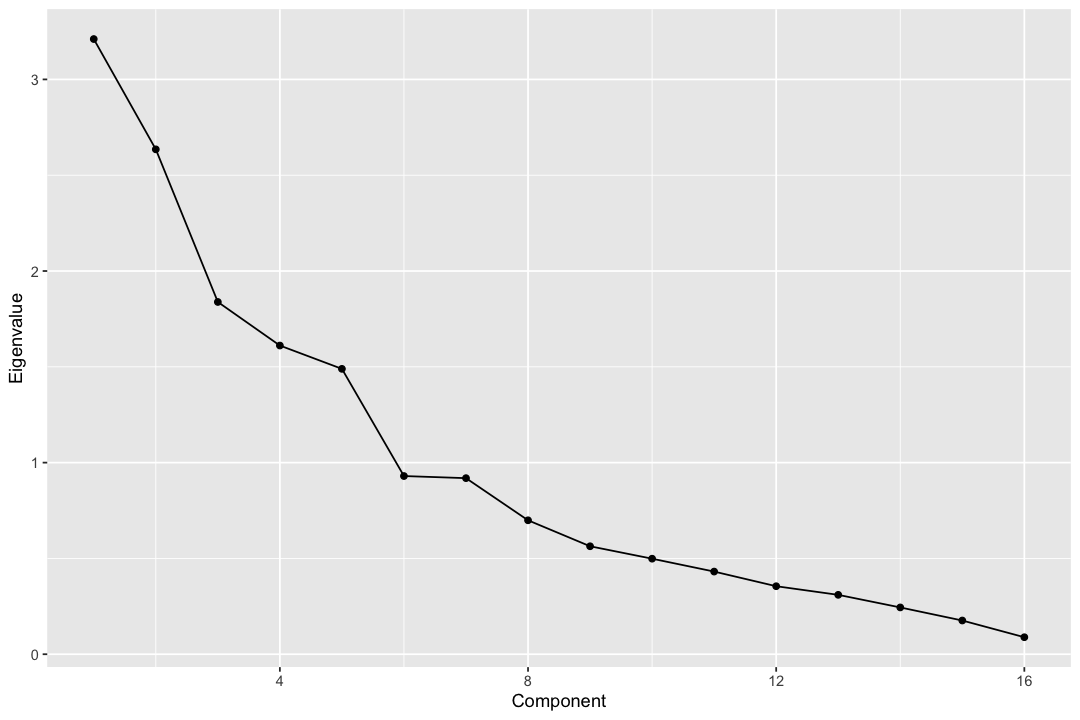

In [23]:
# Pretty Scree Plot with ggplot!
eigen_values %>%
  ggplot(aes(x=1:nrow(.), y=value)) +
  geom_point() +
  geom_line() +
  scale_y_continuous(name = "Eigenvalue") + 
  scale_x_continuous(name = "Component")

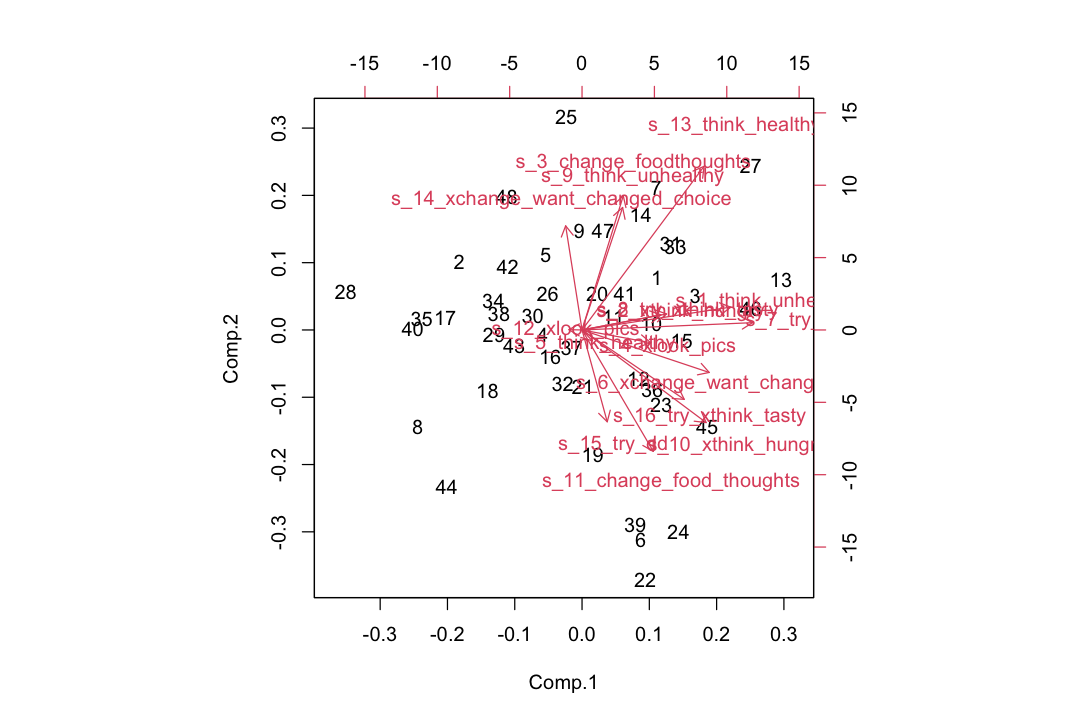

In [24]:
# R Extra: Plots the items as vectors in component space!
pca %>% 
  biplot